Analyzing individual energy terms from all of the poses from the 1KJO cross-docking in CIFDock. --Luke Warrensford 2/22/2020

In [1]:
import pandas as pd

In [2]:
poses = pd.read_csv("1kjo-poses.csv")

In [3]:
poses.head()

,rank,P_intra,L_intra,G_solv,SASA,P_solv,P_SASA,L_solv,L_SASA,vdw,e_elec
0,494.0,2604.149120,-51.704074,-1359.27181,90.845503,-1369.56600,91.838953,-20.849990,3.693847,-32.224977,-8.352894
1,188.0,2667.202380,-40.819536,-1325.81382,89.960178,-1377.20684,91.134000,-20.864407,3.321538,-20.404006,-65.071466
2,361.0,881.331411,-36.681606,-1470.05586,89.035291,-1569.16420,90.448589,-18.159355,3.521619,-8.362635,-101.945928
3,436.0,697.193495,-39.234858,-1468.29255,89.143868,-1553.20695,90.134540,-19.403885,3.525133,-10.161205,-97.228472
4,635.0,2318.015120,-40.427219,-1439.98982,90.477493,-1518.41990,91.497786,-21.043086,3.847078,-18.592212,-66.644240


In [4]:
poses.describe()

,rank,P_intra,L_intra,G_solv,SASA,P_solv,P_SASA,L_solv,L_SASA,vdw,e_elec
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,413.060753,1025.651047,-36.679553,-1407.483191,90.913509,-1445.396714,91.992226,-22.210477,3.806488,-16.955516,-58.554191
std,237.888744,706.489262,45.432572,61.918638,1.446252,73.324923,1.258838,3.289767,0.188751,46.512984,28.913184
min,1.000000,101.878769,-57.128103,-1573.873730,88.152559,-1674.300690,89.428745,-37.866150,3.054255,-40.493645,-175.164997
25%,207.500000,617.106948,-47.737194,-1444.452485,89.858705,-1494.190625,90.976707,-23.428283,3.675740,-26.378878,-73.970010
50%,413.000000,690.874039,-43.678321,-1394.855800,90.825909,-1424.602790,91.983965,-21.472297,3.812508,-21.401209,-55.681178
75%,618.500000,960.862082,-36.697288,-1360.779580,91.760059,-1389.386730,92.873922,-20.109521,3.947653,-16.737578,-36.715421
max,825.000000,3271.265920,471.900169,-1285.901280,97.709256,-1313.886700,96.263423,-16.293984,4.340913,499.868311,0.531118


In [5]:
poses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 11 columns):
rank       823 non-null float64
P_intra    823 non-null float64
L_intra    823 non-null float64
G_solv     823 non-null float64
SASA       823 non-null float64
P_solv     823 non-null float64
P_SASA     823 non-null float64
L_solv     823 non-null float64
L_SASA     823 non-null float64
vdw        823 non-null float64
e_elec     823 non-null float64
dtypes: float64(11)
memory usage: 70.9 KB


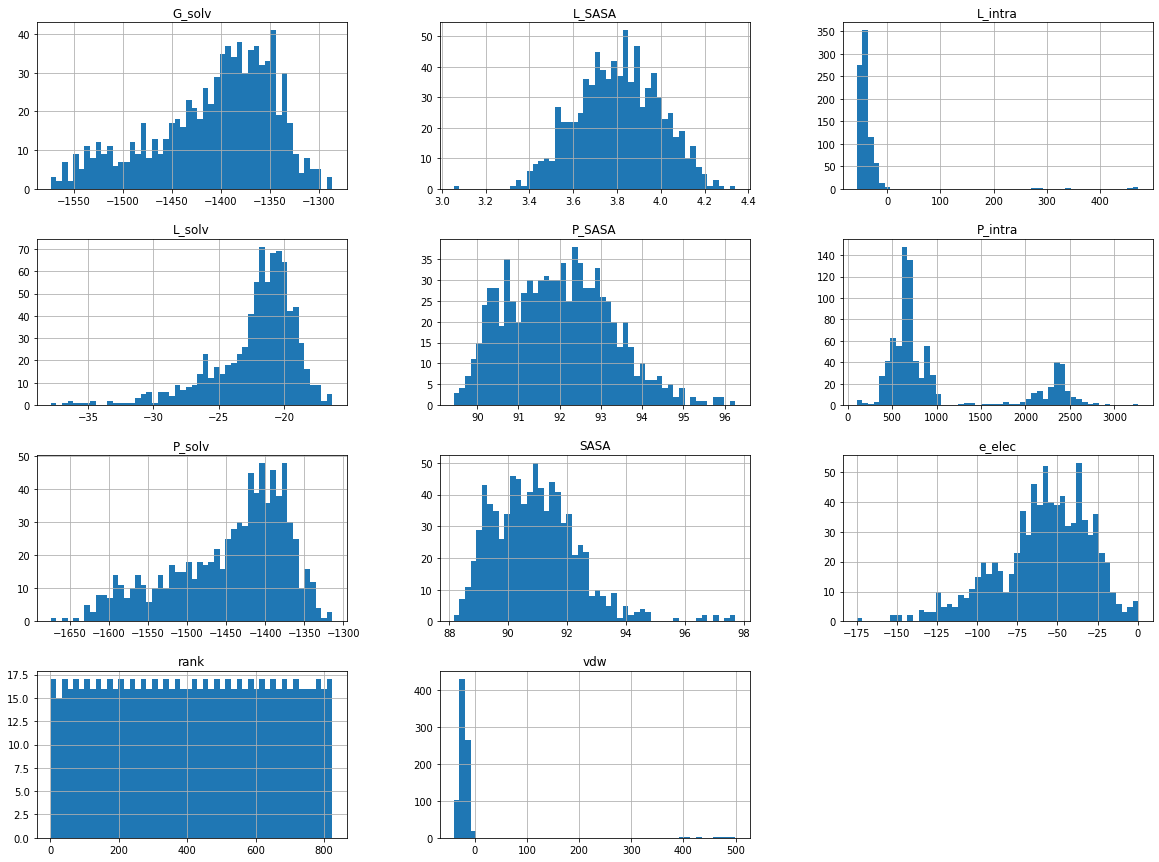

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
poses.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
col_list = list(poses)
#col_list.remove('rank')
#poses['tot_score'] = poses[col_list].sum(axis=1)
#poses.head()

In [8]:
poses['tot_score'] = (poses['L_intra'] + poses['vdw'] + poses['e_elec'] + 
                      poses['G_solv'] + (2 * poses['SASA']) - poses['P_solv'] + 
                      poses['L_solv'] - poses['P_SASA'] + poses['L_SASA']
                     )

tot_score is actually a scoring function based on CZP3 in CIFDocking analysis

In [9]:
poses.describe()

,rank,P_intra,L_intra,G_solv,SASA,P_solv,P_SASA,L_solv,L_SASA,vdw,e_elec,tot_score
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,413.060753,1025.651047,-36.679553,-1407.483191,90.913509,-1445.396714,91.992226,-22.210477,3.806488,-16.955516,-58.554191,-2.844934
std,237.888744,706.489262,45.432572,61.918638,1.446252,73.324923,1.258838,3.289767,0.188751,46.512984,28.913184,91.964017
min,1.000000,101.878769,-57.128103,-1573.873730,88.152559,-1674.300690,89.428745,-37.866150,3.054255,-40.493645,-175.164997,-61.819078
25%,207.500000,617.106948,-47.737194,-1444.452485,89.858705,-1494.190625,90.976707,-23.428283,3.675740,-26.378878,-73.970010,-22.650406
50%,413.000000,690.874039,-43.678321,-1394.855800,90.825909,-1424.602790,91.983965,-21.472297,3.812508,-21.401209,-55.681178,-12.796118
75%,618.500000,960.862082,-36.697288,-1360.779580,91.760059,-1389.386730,92.873922,-20.109521,3.947653,-16.737578,-36.715421,-3.074142
max,825.000000,3271.265920,471.900169,-1285.901280,97.709256,-1313.886700,96.263423,-16.293984,4.340913,499.868311,0.531118,1021.595399


In [55]:
for pose in poses['tot_score']:
    if pose > 700:
        print("found em")
        poses = poses.drop(poses.index[poses.tot_score == pose])
    else:
        continue

found em
found em
found em
found em
found em
found em
found em
found em


Remove any outliers

In [56]:
poses.describe()

,rank,P_intra,L_intra,G_solv,SASA,P_solv,P_SASA,L_solv,L_SASA,vdw,e_elec,tot_score
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,412.180368,1019.562317,-41.005439,-1407.434574,90.911471,-1445.509844,91.990412,-22.221581,3.805566,-21.493344,-58.739174,-11.746171
std,238.382620,704.568900,9.675808,62.020007,1.449397,73.454669,1.259940,3.301024,0.189098,7.034081,28.937611,16.227428
min,1.000000,101.878769,-57.128103,-1573.873730,88.152559,-1674.300690,89.428745,-37.866150,3.054255,-40.493645,-175.164997,-61.819078
25%,205.500000,616.200745,-47.750457,-1444.452485,89.858705,-1494.469250,90.976707,-23.468471,3.674999,-26.441867,-74.326141,-22.776744
50%,412.000000,689.449634,-43.765582,-1394.673640,90.823181,-1424.271610,91.980109,-21.486460,3.809833,-21.631168,-55.741853,-12.993518
75%,617.500000,943.568337,-36.976976,-1360.779580,91.760059,-1389.386730,92.873922,-20.106521,3.943954,-16.927814,-36.884286,-3.493633
max,825.000000,2945.016270,0.308964,-1285.901280,97.709256,-1313.886700,96.263423,-16.293984,4.340913,-0.102948,0.531118,56.258119


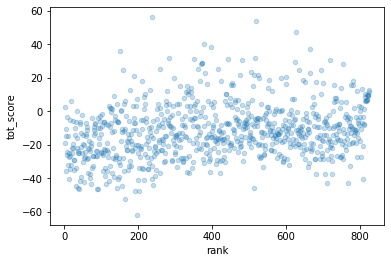

In [57]:
poses.plot(kind="scatter", x="rank", y="tot_score", alpha=0.25)

No correlation between total score and rank, obviously not that simple. Also, strange separation in values of ~3000 and those ~5000...

In [58]:
#poses = poses.drop(['custom_score'], axis=1)
poses.describe()

,rank,P_intra,L_intra,G_solv,SASA,P_solv,P_SASA,L_solv,L_SASA,vdw,e_elec,tot_score
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,412.180368,1019.562317,-41.005439,-1407.434574,90.911471,-1445.509844,91.990412,-22.221581,3.805566,-21.493344,-58.739174,-11.746171
std,238.382620,704.568900,9.675808,62.020007,1.449397,73.454669,1.259940,3.301024,0.189098,7.034081,28.937611,16.227428
min,1.000000,101.878769,-57.128103,-1573.873730,88.152559,-1674.300690,89.428745,-37.866150,3.054255,-40.493645,-175.164997,-61.819078
25%,205.500000,616.200745,-47.750457,-1444.452485,89.858705,-1494.469250,90.976707,-23.468471,3.674999,-26.441867,-74.326141,-22.776744
50%,412.000000,689.449634,-43.765582,-1394.673640,90.823181,-1424.271610,91.980109,-21.486460,3.809833,-21.631168,-55.741853,-12.993518
75%,617.500000,943.568337,-36.976976,-1360.779580,91.760059,-1389.386730,92.873922,-20.106521,3.943954,-16.927814,-36.884286,-3.493633
max,825.000000,2945.016270,0.308964,-1285.901280,97.709256,-1313.886700,96.263423,-16.293984,4.340913,-0.102948,0.531118,56.258119


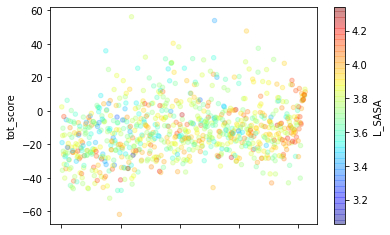

In [59]:
poses.plot(kind="scatter", x="rank", y="tot_score", alpha=0.25, 
           c="L_SASA", cmap=plt.get_cmap("jet"), colorbar=True,)

Plotting total score against rank, with heat map of ligand solvent accesible solvent area represented. This looks somehwat promising, as L_SASA increases as rank increases, so it may be prudent to include this in the algorithm somehow.

In [60]:
corr_matrix = poses.corr()

In [61]:
corr_matrix["rank"].sort_values(ascending=False)

rank         1.000000
tot_score    0.248147
L_SASA       0.227365
vdw          0.137564
e_elec       0.095035
SASA         0.087853
P_SASA      -0.035394
G_solv      -0.042773
P_solv      -0.044001
L_intra     -0.044890
L_solv      -0.053973
P_intra     -0.071043
Name: rank, dtype: float64

Score actually has the highest correlation with rank among variables, fuck yeah!

In [17]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124bcceb8>,
      dtype=object)

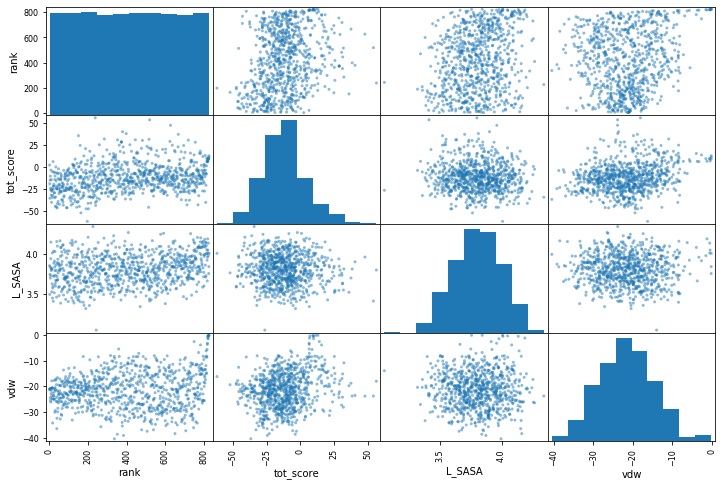

In [62]:
attributes = ["rank", "tot_score", "L_SASA", "vdw"]
scatter_matrix(poses[attributes], figsize=(12, 8))

Van der Waals is heavily correlated with score (obvisouly) becuase of its scaling in the scoring function. Other than that, the rank v total score is pretty poor looking. Rank v L_SASA alone actually looks a lot better than that. May have to incorporate that below.

In [63]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [64]:
train_set, test_set = split_train_test(poses, 0.2)
len(train_set)

652

In [65]:
len(test_set)

163

In [66]:
from zlib import crc32

In [67]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [68]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) 
    return data.loc[~in_test_set], data.loc[in_test_set]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train_set, test_set = train_test_split(poses, test_size=0.2, random_state=42)

In [71]:
poses["score_cat"] = pd.cut(poses["tot_score"],
                            bins=[0., 20, 40, 60, 80, np.inf],
                            labels=[0, 20, 40, 60, 80])

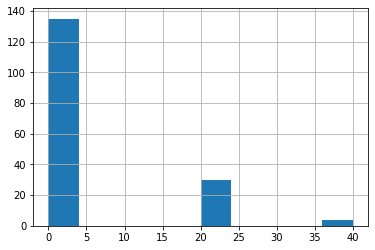

In [72]:
poses["score_cat"].hist()

In [73]:
test_set

,rank,P_intra,L_intra,G_solv,SASA,P_solv,P_SASA,L_solv,L_SASA,vdw,e_elec,tot_score,score_cat
197,167.0,941.532914,-45.329068,-1381.66633,92.158721,-1396.61074,93.526342,-23.440847,3.549666,-20.771669,-40.369755,-20.626163,NaN
303,617.0,494.031268,-50.755557,-1448.12277,91.889563,-1488.89922,92.869974,-20.847712,4.091948,-25.209971,-41.394783,-2.430473,NaN
392,261.0,643.077572,-46.633149,-1471.21218,88.689056,-1502.54735,89.687252,-22.952728,3.979162,-17.601033,-59.080046,-23.261764,NaN
229,582.0,770.322266,-48.747639,-1387.24672,91.190942,-1395.50300,92.392327,-21.682285,3.894529,-31.390663,-26.049013,-25.729234,NaN
668,195.0,693.924540,-49.851507,-1348.92357,92.022950,-1378.71147,93.226609,-21.534726,3.825055,-26.278945,-38.111527,-11.344457,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,155.0,670.258219,-38.725937,-1416.87154,92.462373,-1432.66542,93.651552,-21.041949,3.872428,-24.744504,-71.251555,-44.824444,NaN
628,214.0,519.739688,-47.864670,-1378.15750,90.862984,-1399.07215,91.795928,-19.772718,3.778742,-27.367789,-60.525154,-40.906899,NaN
764,488.0,663.588610,-50.809494,-1417.33751,90.038148,-1439.08057,91.111294,-18.815517,3.842566,-26.913976,-24.266938,-6.255296,NaN
523,461.0,640.087256,-45.479360,-1422.20112,91.859570,-1450.74852,92.945818,-18.202249,3.792655,-26.661241,-35.820365,-3.049837,NaN


All the above commands set up the test set. It selects a random set of poses and defines that as the training set and the rest as the test set. The 'score_cat' is a bin that puts each of the custom_score values into 5 bins.

In [74]:
col = list(test_set)
print(col)

['rank', 'P_intra', 'L_intra', 'G_solv', 'SASA', 'P_solv', 'P_SASA', 'L_solv', 'L_SASA', 'vdw', 'e_elec', 'tot_score', 'score_cat']


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [76]:
print(scaler.fit(test_set))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [77]:
print(scaler.data_max_)

[ 8.24000000e+02  2.94501627e+03  3.08964409e-01 -1.30077679e+03
  9.71196354e+01 -1.33118501e+03  9.58331349e+01 -1.67140948e+01
  4.26643258e+00 -1.07318398e-01  1.74904445e-01  2.55268145e+01
  2.00000000e+01]


In [78]:
print(scaler.transform(test_set))

[[0.18888889 0.22445529 0.16837614 ... 0.73261869 0.35899979        nan]
 [0.74444444 0.05122823 0.06949375 ... 0.7258589  0.61171244        nan]
 [0.30493827 0.10892378 0.14461295 ... 0.60922926 0.322395          nan]
 ...
 [0.58518519 0.11686356 0.0685109  ... 0.83881251 0.55859101        nan]
 [0.55185185 0.10776623 0.16563749 ... 0.76262071 0.60311034        nan]
 [0.04814815 0.20845745 0.13828977 ... 0.58615505 0.26167497        nan]]


In [79]:
test_set_t = scaler.transform(test_set)

In [80]:
test_set_tr = pd.DataFrame(test_set_t)

In [81]:
test_set_tr

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.188889,0.224455,0.168376,0.696368,0.436968,0.809319,0.639811,0.666827,0.221544,0.445038,0.732619,0.359000,NaN
1,0.744444,0.051228,0.069494,0.446913,0.406420,0.540347,0.537324,0.795264,0.810498,0.325843,0.725859,0.611712,NaN
2,0.304938,0.108924,0.144613,0.360243,0.043183,0.500570,0.040364,0.691003,0.688005,0.530189,0.609229,0.322395,NaN
3,0.701235,0.158180,0.106082,0.675421,0.327131,0.812547,0.462742,0.753928,0.596088,0.159854,0.827060,0.288125,NaN
4,0.223457,0.128607,0.085968,0.819273,0.421559,0.861486,0.593010,0.761236,0.520635,0.297134,0.747511,0.487910,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.174074,0.119445,0.288700,0.564219,0.471431,0.704238,0.659361,0.785643,0.572084,0.338343,0.528961,0.022920,NaN
159,0.246914,0.061180,0.122172,0.709539,0.289910,0.802145,0.369619,0.848508,0.470335,0.267892,0.599699,0.077329,NaN
160,0.585185,0.116864,0.068511,0.562470,0.196297,0.685542,0.262718,0.895917,0.539653,0.280080,0.838813,0.558591,NaN
161,0.551852,0.107766,0.165637,0.544214,0.403016,0.651536,0.549166,0.926292,0.485446,0.286867,0.762621,0.603110,NaN


In [82]:
#test_set_tr = test_set_tr.drop(['score_cat'], axis=1)
test_set_tr.columns = col

In [83]:
test_set_tr

,rank,P_intra,L_intra,G_solv,SASA,P_solv,P_SASA,L_solv,L_SASA,vdw,e_elec,tot_score,score_cat
0,0.188889,0.224455,0.168376,0.696368,0.436968,0.809319,0.639811,0.666827,0.221544,0.445038,0.732619,0.359000,NaN
1,0.744444,0.051228,0.069494,0.446913,0.406420,0.540347,0.537324,0.795264,0.810498,0.325843,0.725859,0.611712,NaN
2,0.304938,0.108924,0.144613,0.360243,0.043183,0.500570,0.040364,0.691003,0.688005,0.530189,0.609229,0.322395,NaN
3,0.701235,0.158180,0.106082,0.675421,0.327131,0.812547,0.462742,0.753928,0.596088,0.159854,0.827060,0.288125,NaN
4,0.223457,0.128607,0.085968,0.819273,0.421559,0.861486,0.593010,0.761236,0.520635,0.297134,0.747511,0.487910,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.174074,0.119445,0.288700,0.564219,0.471431,0.704238,0.659361,0.785643,0.572084,0.338343,0.528961,0.022920,NaN
159,0.246914,0.061180,0.122172,0.709539,0.289910,0.802145,0.369619,0.848508,0.470335,0.267892,0.599699,0.077329,NaN
160,0.585185,0.116864,0.068511,0.562470,0.196297,0.685542,0.262718,0.895917,0.539653,0.280080,0.838813,0.558591,NaN
161,0.551852,0.107766,0.165637,0.544214,0.403016,0.651536,0.549166,0.926292,0.485446,0.286867,0.762621,0.603110,NaN


Test set has been transformed into values between 0 and 1 (which will be useful for nerual network deployment)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125473978>,
      dtype=object)

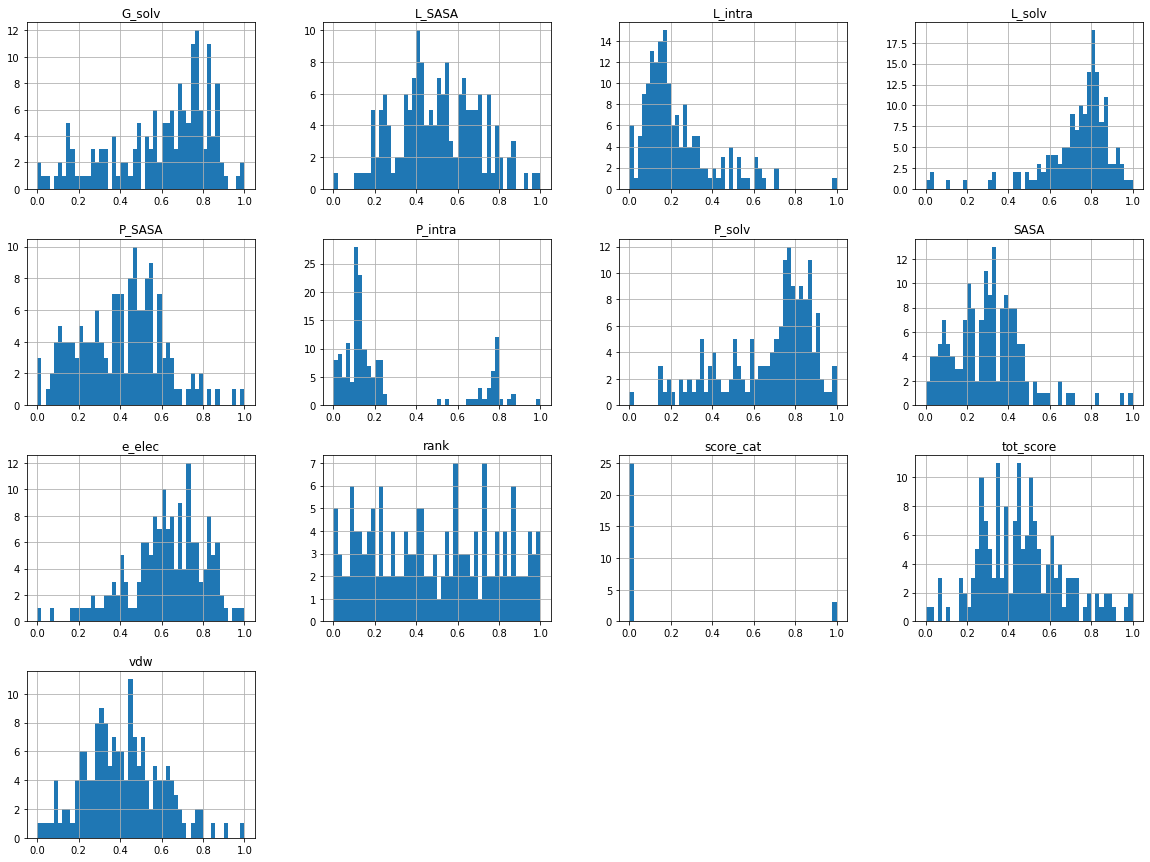

In [84]:
#test_set_final = test_set_tr.drop(columns = ['tot_score', 'custom_score'])
test_set_tr.hist(bins=50, figsize=(20,15))

Score (total and new) are actually Gaussian distributions now, which is promising.

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
score = test_set_tr['tot_score'].values.reshape(-1,1)

In [87]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
score_poly = poly_features.fit_transform(score)

In [88]:
score[0]

array([0.35899979])

In [89]:
score_poly[0]

array([0.35899979, 0.12888085])

In [90]:
rank_y = test_set_tr['rank']

In [91]:
rank_y

0      0.188889
1      0.744444
2      0.304938
3      0.701235
4      0.223457
         ...   
158    0.174074
159    0.246914
160    0.585185
161    0.551852
162    0.048148
Name: rank, Length: 163, dtype: float64

In [92]:
import sklearn.linear_model

In [93]:
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(score_poly, rank_y)
lin_reg.intercept_, lin_reg.coef_

(0.10641478661817777, array([ 1.36542356, -0.99557839]))

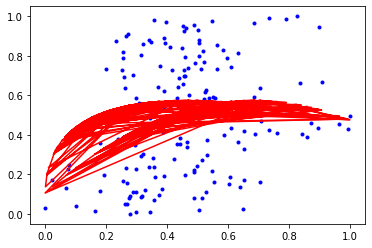

In [94]:
plt.plot(score, rank_y, "b.", label='original data')
plt.plot(score_poly, lin_reg.predict(score_poly) ,'-r', label='polynomial')

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
score_x = test_set_tr['tot_score'].values.reshape(-1,1)

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(score_x, test_set_tr['rank'])
lin_reg.intercept_, lin_reg.coef_

(0.31779820881173293, array([0.36343416]))

In [104]:
lin_reg.score(score_x, test_set_tr['rank'])

0.06042980866232339

R^2 value

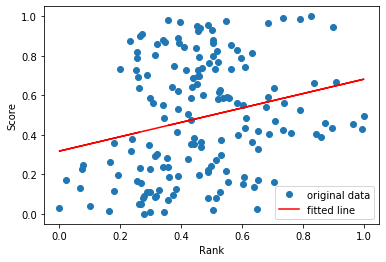

In [106]:
plt.plot(score_x, test_set_tr['rank'], 'o', label='original data')
plt.plot(score_x, lin_reg.predict(score_x), 'r', label='fitted line')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.legend(loc='best')